<a href="https://colab.research.google.com/github/LuisBrenis3011/quimica3/blob/main/PC2-Morales_Brenis_Luis_David.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pregunta 1: DataFrames y listas en python (4 puntos)
Usando PeriodicTable, crea una tabla con 20 elementos químicos y en las columnas considera: nombre, simbolo, masa_atomica, numero_atomico y valencias. Puedes ayudarte del siguiente material.

In [ ]:
!pip install periodictable
!pip install rdkit
!pip install pandas

In [ ]:
!pip install periodictable
!pip install rdkit
!pip install pandas
from rdkit import Chem
import pandas as pd
import periodictable
PeriodicTable = Chem.GetPeriodicTable()
simbolo_elementos = []
for i in range(1, 21):
    simbolo_elementos.append(PeriodicTable.GetElementSymbol(i))

print(simbolo_elementos)
nuevos_elementos = []
for x in simbolo_elementos:
    elemento_periodictable = periodictable.elements.symbol(x)
    nuevos_elementos.append(elemento_periodictable)

nombres = []
simbolos = []
masas_atomicas = []
numeros_atomicos = []
valencias = []

for element in nuevos_elementos:
    nombres.append(element.name)
    simbolos.append(element.symbol)
    masas_atomicas.append(element.mass)
    numeros_atomicos.append(element.number)

valencias = [PeriodicTable.GetValenceList(x) for x in range(1, 21)]

data = {
    'nombre': nombres,
    'simbolo': simbolos,
    'masa_atomica': masas_atomicas,
    'numero_atomico': numeros_atomicos,
    'valencias': valencias
}

df = pd.DataFrame(data)
print(df)

Pregunta 2: Configuración electrónica (4 puntos)
Escribe un programa que lea el número atómico y me indique el número de electrones de valencia.

In [ ]:
# Número de protones como input
numero_atomico = int(input("ingresa el número de protones: "))
# Completa con tu código

ingresa el número de protones: 8

In [41]:
from rdkit import Chem
numero_atomico = int(input("Ingresa el número atómico: "))
PeriodicTable = Chem.GetPeriodicTable()
simbolo = PeriodicTable.GetElementSymbol(numero_atomico)
nombre = PeriodicTable.GetElementName(numero_atomico)
electrones_de_valencia = PeriodicTable.GetNOuterElecs(numero_atomico)
print(f"Elemento: {nombre} ({simbolo})")
print(f"El número de electrones de valencia para el número atómico {numero_atomico} es: {electrones_de_valencia}")

Ingresa el número atómico: 14
Elemento: Silicon (Si)
El número de electrones de valencia para el número atómico 14 es: 4


Pregunta 3: Molecularidad & compuestos covalentes (4 puntos)

In [ ]:
#Código necesario para generar la imagen, no editar
!pip install faerun-notebook==0.1.5b0
import ipywidgets as widgets
from faerun_notebook import SmilesDrawer
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
SmilesDrawer(background='#1e1e1e', options={'scale': 1.25}, theme='dark', value=[('Rxn', 'CC=CC.O=O>>C(=O)=O.O…

In [ ]:
SmilesDrawer(value=[("Rxn", "CC=CC.O=O>>C(=O)=O.O")], theme='dark', background="#1e1e1e", options={'scale': 1.25})

In [ ]:
!pip install chempy
from chempy import balance_stoichiometry
reactantes = {'C4H8': 1, 'O2': 1}
productos = {'CO2': 1, 'H2O': 1}
balanceo = balance_stoichiometry(reactantes, productos)
coeficientes_reactantes = balanceo[0]
coeficientes_productos = balanceo[1]
ecuacion_balanceada = ' + '.join([f"{coef} {reactante}" for reactante, coef in coeficientes_reactantes.items()]) + ' -> ' + ' + '.join([f"{coef} {producto}" for producto, coef in coeficientes_productos.items()])
print(ecuacion_balanceada)

Pregunta 4: SMILES, RDKit y Open Babel (4 puntos)

Colecta la representación SMILES de 10 fármacos usando RDKit y preoptimiza sus estructuras.

In [ ]:
from rdkit.Chem import MolFromSmiles, Draw
aspirina = "CC(=O)OC1=CC=CC=C1C(=O)O"
lisinopril = "CC(C)NCC(O)CO"
metformina = "CN(C)C(=N)N"
atorvastatina = "CC(C)C[C@@H](C(=O)N[C@@H](CC(C)C)C(=O)O)C1=CC(C)=C(C=C1)C(C)C"
amoxicilina = "CC1([C@@H](N(C1=O)C2=CC=C(C=C2)O)C(=O)O)C"
losartan = "CC(C)(C)NC(C)=O"
levothyroxina = "C(C1=CC=C(C=C1)Cl)(C2=CC=CC=C2)OC(C3=CC=CC=C3)=C(C=C4C(=O)NC(=O)C4)OC"
simvastatina = "CC(C)C[C@H](NC(=O)[C@H](C)O)C1=CN(C)C2=CC=CC=C12"
omeprazol = "CC1=CN=C(N1)C2=CC(=NC=C2)N3C(=O)CCC3=O"
paracetamol = "CC(=O)NC1=CC=C(C=C1)O"
farmacos = [
    ("Aspirina", aspirina),
    ("Lisinopril", lisinopril),
    ("Metformina", metformina),
    ("Atorvastatina", atorvastatina),
    ("Amoxicilina", amoxicilina),
    ("Losartan", losartan),
    ("Levotiroxina", levothyroxina),
    ("Simvastatina", simvastatina),
    ("Omeprazol", omeprazol),
    ("Paracetamol", paracetamol),
]
mols = []
for nombre, smiles in farmacos:
    mol = MolFromSmiles(smiles)
    if mol is not None:
        mols.append(mol)
img = Draw.MolsToGridImage(mols, molsPerRow=5)
img

In [ ]:
!apt-get -qq install -y openbabel

In [ ]:
!obabel -i smi smile.txt -o sdf --gen3D > output.sdf

In [ ]:
!grep WARNING output.sdf

In [ ]:
!obabel -i sdf output.sdf -o mol2 -O _.mol2 -h -m

In [ ]:
!obabel *.mol2 -O opt.xyz --minimize --sd --steps 20000 --ff MMFF94 -p 7.4 --log -m

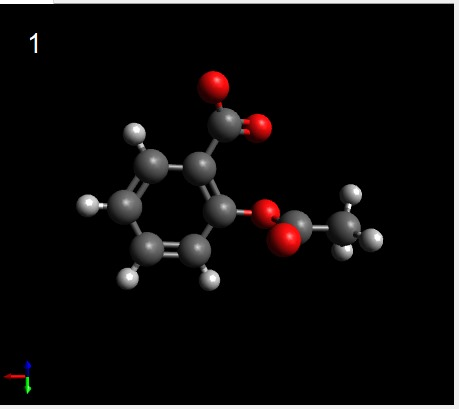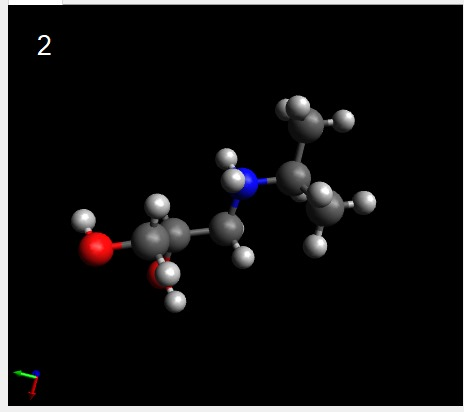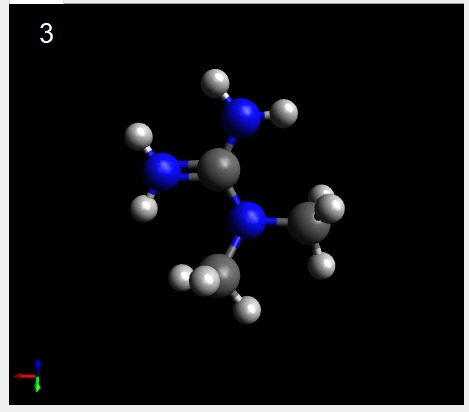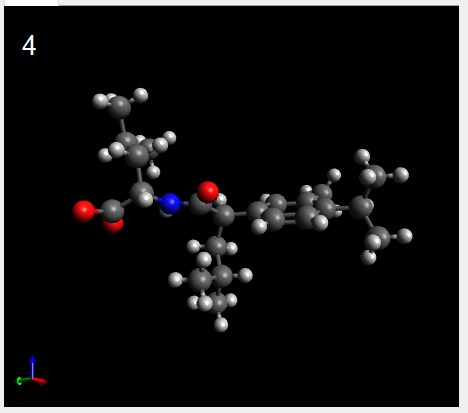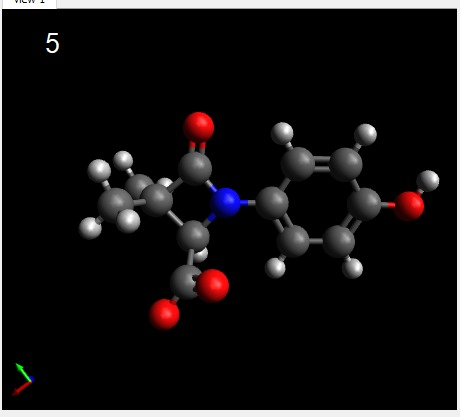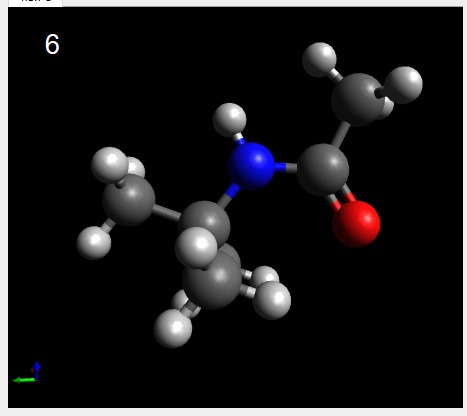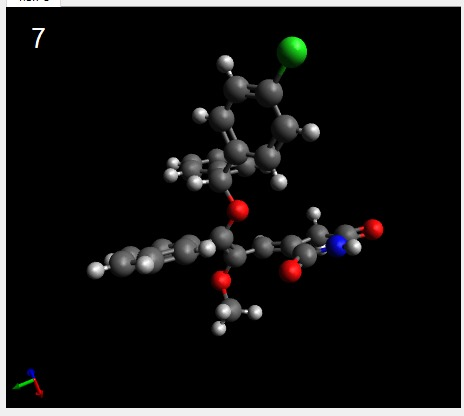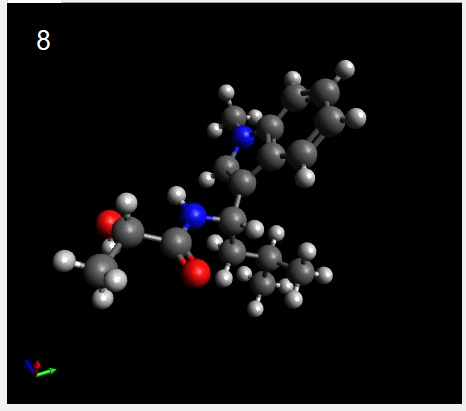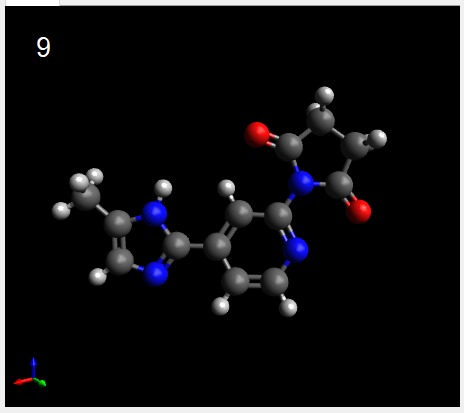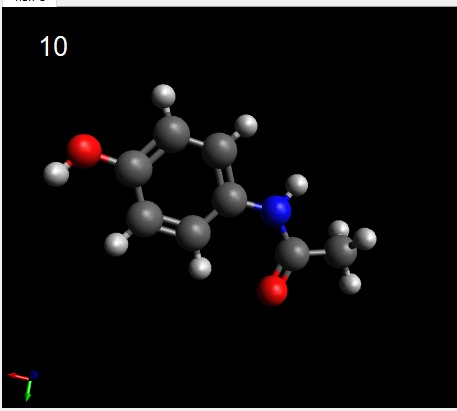

Pregunta 5: Método científico (4 puntos)

Leer el artículo disponibilizado por el profesor y explica cómo es aplicado el método científico. Emplea como máximo 300 palabras.

Primero se observó que el tema de configuración electrónica era un tema de poco interés entre los estudiantes y se identificó que era necesario el uso de herramientas didácticas. En segundo lugar, plantearon el problema que trataba sobre la dificultad para comprender la configuración electrónica. En tercer lugar, plantearon como hipótesis que las cajas de huevos y esferas, junto con la aplicación de conceptos de energía de ionización y radio atómico, podría mejorar la comprensión de los estudiantes sobre la configuración electrónica. En cuarto lugar, en la parte de experimentación, hicieron modelos de electrones y núcleos de átomos con cajas de huevos, además se utilizaron herramientas como el software Orbital Viewer para visualizar los orbitales electrónicos. En quinto lugar, se recopilaron datos sobre el desempeño de los estudiantes y sus respuestas a preguntas evaluativas. En sexto lugar, se analizaron los resultados cualitativos y cuantitativos obtenidos de las actividades de los estudiantes. Finalmente concluyeron que el modelo didáctico con cajas de huevos y esferas fue efectivo para mejorar la comprensión de los estudiantes sobre la configuración electrónica